In [1]:
# Mount Google Drive to access files stored in MyDrive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Load the given text file from Google Drive
file_path = "/content/drive/MyDrive/TextSet/alice_in_wonderland.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

print("Text loaded successfully!")
print(text[:500])  # Print a sample of the text


Text loaded successfully!
*** START OF THE PROJECT GUTENBERG EBOOK 11 ***

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The


In [3]:
# Remove unwanted START and END markers from Project Gutenberg
# Remove multiple newlines and extra spaces
import re

clean_text = re.sub(r"(\*\*\* START OF.*?\*\*\*)|(\*\*\* END OF.*?\*\*\*)", "", text)
clean_text = re.sub(r'\n+', '\n', clean_text).strip()

print("Cleaned text length:", len(clean_text))
print(clean_text[:500])


Cleaned text length: 143713
[Illustration]
Alice’s Adventures in Wonderland
by Lewis Carroll
THE MILLENNIUM FULCRUM EDITION 3.0
Contents
 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobster Quadrill


In [4]:
# Count the exact word occurrences of "Alice"
alice_count = len(re.findall(r"\bAlice\b", clean_text))
print(f"'Alice' appears {alice_count} times.")


'Alice' appears 398 times.


In [5]:
# Find dialogues enclosed in quotes “ ”
dialogues = re.findall(r'“[^”]+”', clean_text)

# Filter dialogues to only meaningful ones based on length
meaningful_dialogues = [
    d.strip("“”") for d in dialogues
    if len(d.split()) >= 4 or len(d) > 25
]

print("Total dialogues found:", len(dialogues))
print("Meaningful dialogues:", len(meaningful_dialogues))

# Display first few dialogues
for d in meaningful_dialogues[:10]:
    print("-", d)


Total dialogues found: 1109
Meaningful dialogues: 874
- and what is the use of a book,
- without pictures or conversations?
- Oh
dear! Oh dear! I shall be late!
- after such a fall as this, I shall
think nothing of tumbling down stairs! How brave they’ll all think me
at home! Why, I wouldn’t say anything about it, even if I fell off the
top of the house!
- I wonder how
many miles I’ve fallen by this time?
- I must be
getting somewhere near the centre of the earth. Let me see: that would
be four thousand miles down, I think—
- —yes, that’s about the right distance—but
then I wonder what Latitude or Longitude I’ve got to?
- I wonder if I shall fall right _through_
the earth! How funny it’ll seem to come out among the people that walk
with their heads downward! The Antipathies, I think—
- —but I shall have to ask them what the name of the
country is, you know. Please, Ma’am, is this New Zealand or Australia?
- And what
an ignorant little girl she’ll think me for asking! No, it’ll never do

In [6]:
import pandas as pd
import sqlite3

# Ignore common words that are capitalized at the start of sentences
ignore_words = {
    'The', 'And', 'But', 'For', 'Then', 'She', 'He', 'Her', 'His',
    'It', 'At', 'To', 'In', 'On', 'Of', 'As', 'So', 'Be', 'That',
    'This', 'I', 'You', 'They', 'We', 'A', 'An', 'All', 'No', 'Not',
    'From', 'If', 'When', 'One', 'What', 'Was', 'Had', 'There'
}

# Convert set to DataFrame
df_ignore = pd.DataFrame(sorted(ignore_words), columns=["word"])

# Save ignore word list into a database
db_path = "/content/drive/MyDrive/TextSet/ignore_words.db"
conn = sqlite3.connect(db_path)
df_ignore.to_sql("ignore_words", conn, if_exists="replace", index=False)
conn.close()

print("Ignore words database saved!")


Ignore words database saved!


In [7]:
from collections import Counter

# Load ignore words again from database
conn = sqlite3.connect(db_path)
df = pd.read_sql("SELECT word FROM ignore_words", conn)
conn.close()

ignore_words = set(df["word"].tolist())

# Extract capitalized words → potential character names
potential_names = re.findall(r'\b[A-Z][a-zA-Z]+\b', clean_text)

# Remove ignore words
filtered_names = [n for n in potential_names if n not in ignore_words]

# Count how many times each name appears
name_counts = Counter(filtered_names)

print("Top 10 characters:")
for name, count in name_counts.most_common(10):
    print(f"{name}: {count}")


Top 10 characters:
Alice: 398
Queen: 75
King: 61
Turtle: 59
Mock: 57
Hatter: 55
Gryphon: 55
Rabbit: 47
Duchess: 42
Dormouse: 40


In [8]:
import pandas as pd

df = pd.DataFrame(name_counts.most_common(50), columns=["Character", "Frequency"])

csv_path = "/content/drive/MyDrive/TextSet/alice_text_analysis.csv"
df.to_csv(csv_path, index=False)

print("CSV saved to:", csv_path)


CSV saved to: /content/drive/MyDrive/TextSet/alice_text_analysis.csv


In [ ]:
import pandas as pd

# Convert list to DataFrame
df = pd.DataFrame(meaningful_dialogues, columns=["dialogue"])

# Path in Google Drive
csv_path = "/content/drive/MyDrive/TextSet/meaningful_dialogues.csv"

# Save CSV
df.to_csv(csv_path, index=False, encoding="utf-8")

print("CSV file saved to:", csv_path)


CSV file saved to: /content/drive/MyDrive/TextSet/meaningful_dialogues.csv


In [ ]:
import sqlite3

db_path = "/content/drive/MyDrive/TextSet/alice_text_analysis.db"
conn = sqlite3.connect(db_path)

df.to_sql("character_frequency", conn, if_exists="replace", index=False)
conn.close()

print("Database saved to:", db_path)

Database saved to: /content/drive/MyDrive/TextSet/alice_text_analysis.db


In [ ]:
import sqlite3

db_path = "/content/drive/MyDrive/TextSet/dialogues_analysis.db"

# Connect to DB (creates file if not exists)
conn = sqlite3.connect(db_path)

# Save DataFrame → SQL table
df.to_sql("meaningful_dialogues", conn, if_exists="replace", index=False)

conn.close()

print("Database saved to:", db_path)


Database saved to: /content/drive/MyDrive/TextSet/dialogues_analysis.db


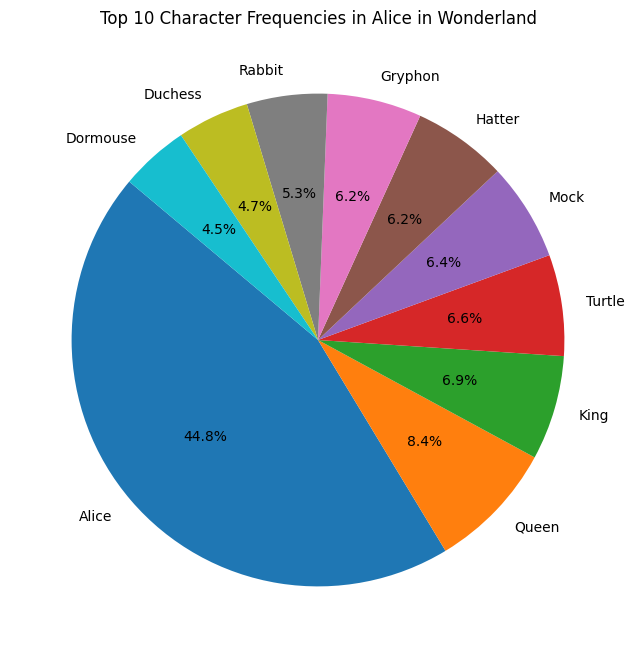

Pie chart saved at: /content/drive/MyDrive/TextSet/top10_characters_pie.png


In [ ]:
import matplotlib.pyplot as plt

top10 = name_counts.most_common(10)
labels = [x[0] for x in top10]
sizes = [x[1] for x in top10]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Character Frequencies in Alice in Wonderland")

# Save in Google Drive
save_path = "/content/drive/MyDrive/TextSet/top10_characters_pie.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

print("Pie chart saved at:", save_path)


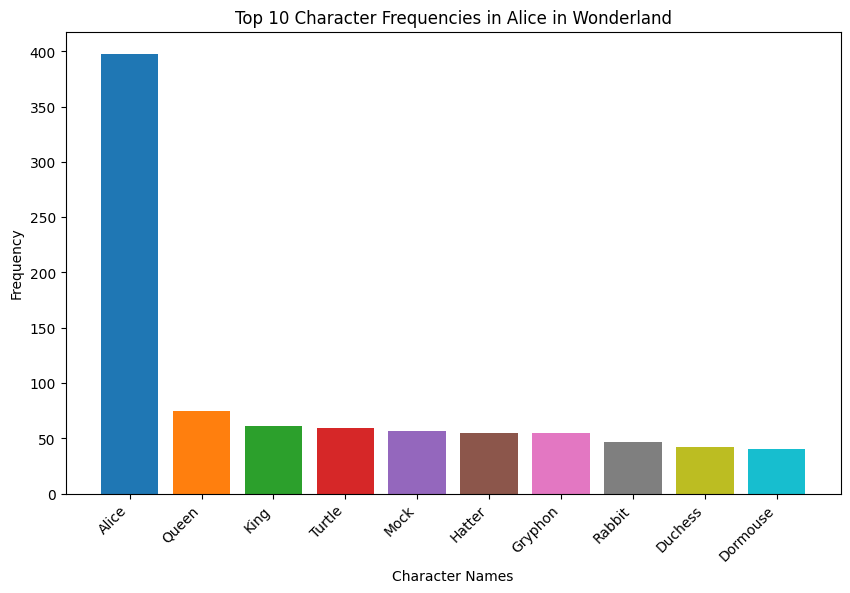

Bar chart saved at: /content/drive/MyDrive/TextSet/top10_characters_bar_colored.png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get top 10 characters
top10 = name_counts.most_common(10)
labels = [x[0] for x in top10]
sizes = [x[1] for x in top10]

# Generate different colors for each bar
colors = plt.cm.tab10(np.linspace(0, 1, len(labels)))

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=colors)

plt.xlabel("Character Names")
plt.ylabel("Frequency")
plt.title("Top 10 Character Frequencies in Alice in Wonderland")
plt.xticks(rotation=45, ha='right')

# Save to Google Drive
save_path = "/content/drive/MyDrive/TextSet/top10_characters_bar_colored.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

print("Bar chart saved at:", save_path)
